In [4]:
from utils import *

import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from tqdm import tqdm
import os
import pandas as pd
import seaborn as sns

In [17]:

parameters = {'axes.labelsize': 16,
                'axes.titlesize': 25,
                "xtick.labelsize": 12,
                "ytick.labelsize": 12}

plt.rcParams.update(parameters)

sns.set_style("darkgrid")

## Filter the data for the telescope UT1 in mode VLTI


In [3]:
filter_and_save_data(data_path_psd="/mnt/batch/tasks/shared/LS_root/mounts/clusters/filter/code/MDS7201/data/PSDs/preUpgrade",
                    data_path_state="/mnt/batch/tasks/shared/LS_root/mounts/clusters/filter/code/MDS7201/data/statesAndFeatures/preUpgrade",
                    output_directory="examplefilter" ,
                    # end_loop=True
                    )

  0%|          | 0/4 [23:04<?, ?it/s]


KeyboardInterrupt: 

## Trainning for the sensor m1-3 in the telescope UT1

In [6]:
data_m1_3 = datasensor(sensor="m1-3",
                        path="examplefilter/UT1" )

# Dividir el DataFrame concatenado en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data_m1_3, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("Forma del conjunto de entrenamiento:", train_data.shape)
print("Forma del conjunto de prueba:", test_data.shape)

Forma del conjunto de entrenamiento: (30612, 1004)
Forma del conjunto de prueba: (7653, 1004)


In [7]:
train_tensor = torch.Tensor(np.log(train_data.dropna().values)).float()
val_tensor = torch.Tensor(np.log(test_data.dropna().values)).float()

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
modelo= Autoencoder(1004, 100,0.08)

train = train_tensor
val = val_tensor

epocas = 1000
batch = 512
lr = 1e-3
optimizador = torch.optim.Adam(modelo.parameters())
perdida = nn.L1Loss()

use_gpu = True
early_stopping=EarlyStopping(50)
history = train_model(modelo, train, val, epocas, batch, lr, optimizador, perdida, early_stopping, use_gpu )




Epoch 1/1000 - Batch 60/60
 - Train loss: 3.97689, Val loss: 3.55078
Epoch 2/1000 - Batch 60/60
 - Train loss: 1.41391, Val loss: 3.26337
Epoch 3/1000 - Batch 60/60
 - Train loss: 1.25859, Val loss: 2.81025
Epoch 4/1000 - Batch 60/60
 - Train loss: 1.20116, Val loss: 4.08927
Epoch 5/1000 - Batch 60/60
 - Train loss: 1.20339, Val loss: 2.72065
Epoch 6/1000 - Batch 60/60
 - Train loss: 1.11501, Val loss: 4.00933
Epoch 7/1000 - Batch 60/60
 - Train loss: 1.04069, Val loss: 4.36136
Epoch 8/1000 - Batch 60/60
 - Train loss: 1.05624, Val loss: 4.16541
Epoch 9/1000 - Batch 60/60
 - Train loss: 1.02463, Val loss: 3.85478
Epoch 10/1000 - Batch 60/60
 - Train loss: 0.98338, Val loss: 3.55072
Epoch 11/1000 - Batch 60/60
 - Train loss: 0.98849, Val loss: 3.43818
Epoch 12/1000 - Batch 60/60
 - Train loss: 1.00347, Val loss: 3.74954
Epoch 13/1000 - Batch 60/60
 - Train loss: 0.94909, Val loss: 4.17376
Epoch 14/1000 - Batch 60/60
 - Train loss: 0.95523, Val loss: 3.32682
Epoch 15/1000 - Batch 60/60
 

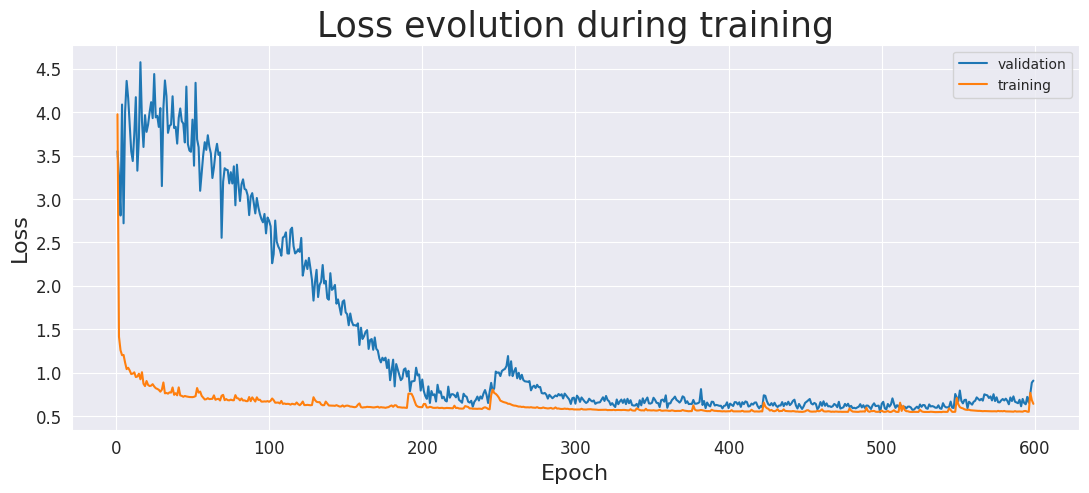

In [18]:
show_curves(history)
model = early_stopping.best_model
# torch.save(modelo, "./m1-3")

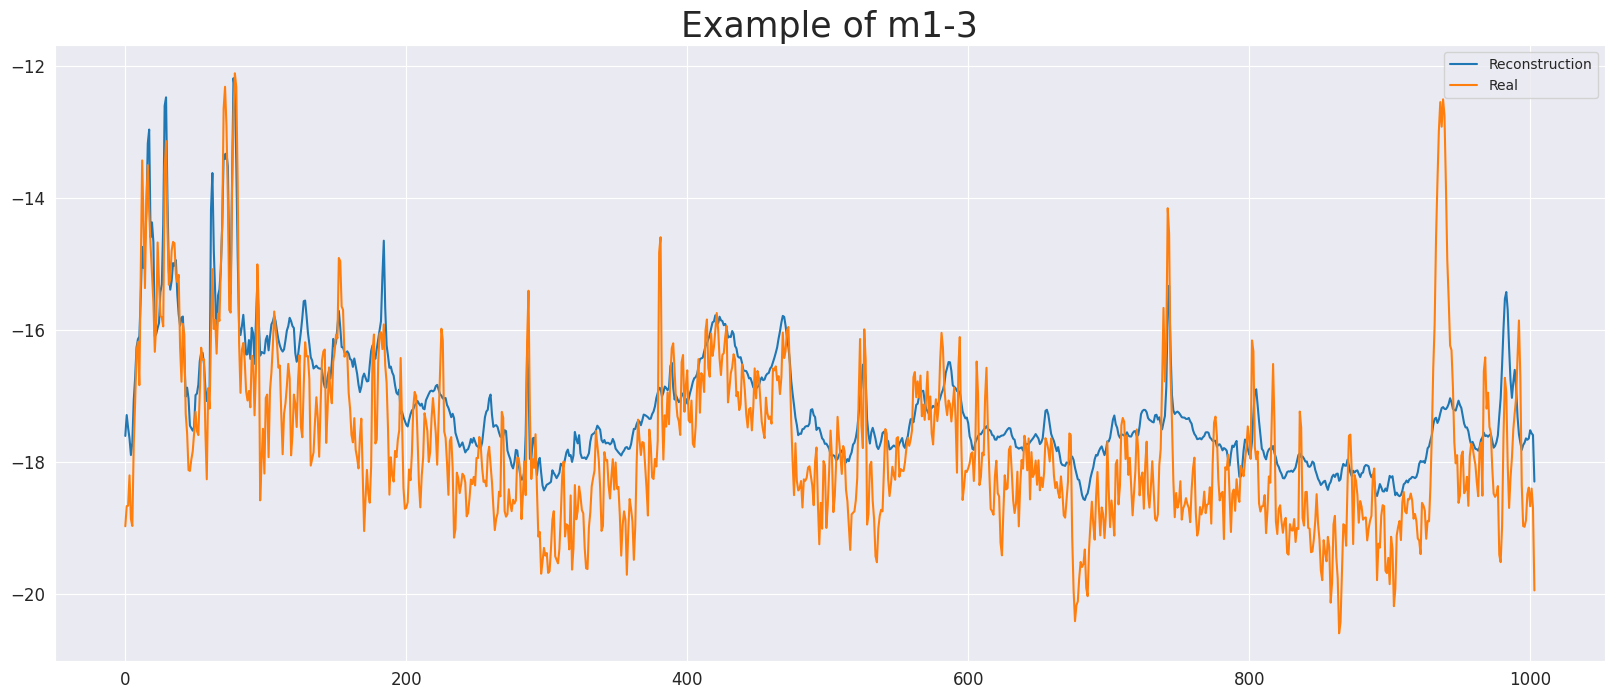

In [21]:
x = modelo(val_tensor[30:31,:])
plt.figure(figsize=(20,8))
plt.title("Example of m1-3")
plt.plot(x[0].detach().numpy(), label= "Reconstruction")
plt.plot(val_tensor[30].detach().numpy(), label = "Real")
plt.legend()
plt.show()